<a href="https://colab.research.google.com/github/Stepeech/NNLearn/blob/main/%D0%9F%D0%A05_done.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Задание 1. Использование предобученной модели

## 1.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras

model = keras.applications.MobileNet()

model.summary() 
model.get_config() 

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

{'name': 'mobilenet_1.00_224',
 'trainable': True,
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 224, 224, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'input_3'},
   'name': 'input_3',
   'inbound_nodes': []},
  {'class_name': 'Conv2D',
   'config': {'name': 'conv1',
    'trainable': True,
    'dtype': 'float32',
    'filters': 32,
    'kernel_size': (3, 3),
    'strides': (2, 2),
    'padding': 'same',
    'data_format': 'channels_last',
    'dilation_rate': (1, 1),
    'groups': 1,
    'activation': 'linear',
    'use_bias': False,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'kernel_regularizer': None,
    'bias_regularizer': None,
    'activity_regularizer': None,
    'kernel_constraint': None,
    'bias_constraint': None},
   'name': 'conv1',
   'inbound_nodes': [[['input_3', 0, 0, {}]]]},
  {'cla

## 1.2. Загрузите из сети Интернет 5 изображений с разными классами, из тех, что приведены в [списке](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), и сохраните их представление в список images

In [ ]:
from urllib.request import urlopen
import cv2
import numpy as np

imageUrls = ['https://pokrovsk.news/uploads/news/redactor/rgpdskuuvpqzrhjw.jpg', 'https://i.ebayimg.com/images/g/W-IAAOSwFFRix1Ab/s-l500.jpg', 'https://ichef.bbci.co.uk/news/640/cpsprodpb/AE51/production/_95252644_tass_732047.jpg', 'https://upload.wikimedia.org/wikipedia/commons/9/93/NASA_Space_Shuttle_Discovery_STS-92.jpg', 'https://www.hellomonaco.ru/wp-content/uploads/2019/06/baukran-3703469_640-640x405-640x405.jpg']
# Фонтан, Айпод, Танк, Кран, Шаттл
images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

## 1.3. Напишите функцию, принимающую на вход список с исходными изображениями и возвращающую список с преобразованными изображениями под формат входных данных выбранной Вами модели СНС.

(Не забудьте создать независимую копию исходного списка в теле функции, для обработки именно независимой копии, а не оригинального списка)

In [ ]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

## 1.4. Напишите функцию, принимающую на вход список с представлениями обработаннах изображений (результат работы функции из п. 1.3.) и возвращающую список предсказанных нейросетью классов. 

In [ ]:
def predict(images):
    normalized_images = normalize(images, (224, 224, 3))
    preprcessed_images = keras.applications.mobilenet.preprocess_input(normalized_images)
    prediction = model.predict(preprcessed_images)
    return prediction

def print_predict(preds, image):
    output = image.copy()

    height = 30
    margin = 30
    for pred in preds:
        height += margin
        text = "{}: {:.2f}%".format(pred[1], pred[2] * 100)
        _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
            (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 1.5. Выведите изображения и соответствующие им классы, вызывая соответствующие функции

1/1 [==============================] - 0s 173ms/step


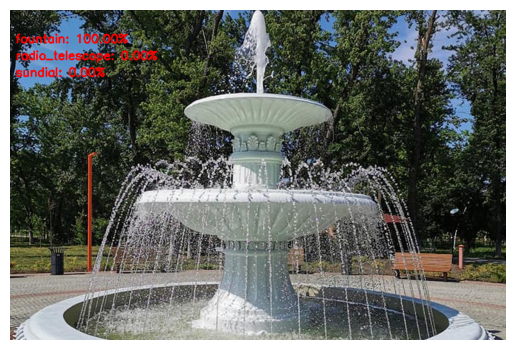

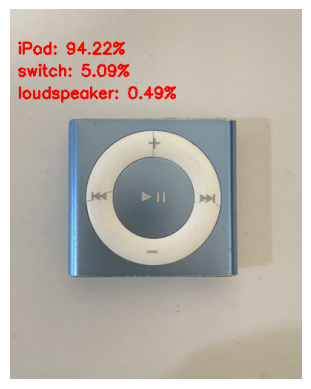

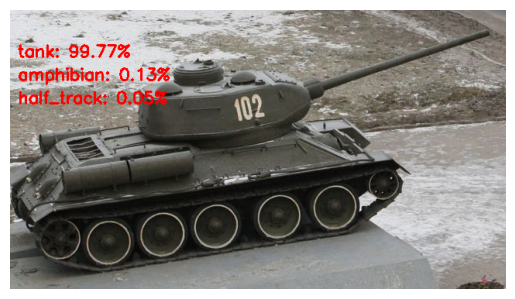

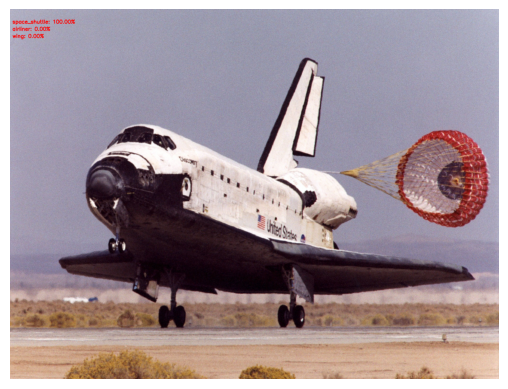

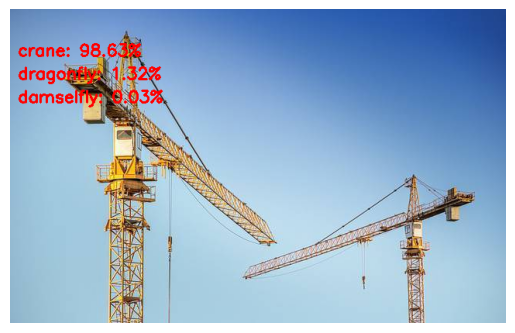

In [ ]:
predictions = predict(images)
predictions = keras.applications.mobilenet.decode_predictions(predictions, top=3)
for i, preds in enumerate(predictions):
    print_predict(preds, images[i])

# Задание 2. Использование обученной модели для работы со своим датасетом

## 2.1. Выберите и импортируйте предобученную модель СНС для решения задач классификации из имеющихся в Keras: https://keras.io/api/applications/

In [ ]:
import matplotlib.pyplot as plt
from tensorflow import keras
import cv2
import numpy as np
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.optimizers import Adam

## 2.2. Подготовка тренировочных данных. Разделение на обучающую и тестовую выборку

In [ ]:
img_height,img_width=500,500
batch_size=32
train_ds = keras.preprocessing.image_dataset_from_directory(
  'C:/Users/Stepan/ai/ADataset/',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

val_ds = keras.preprocessing.image_dataset_from_directory(
  'C:/Users/Stepan/ai/ADataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
class_names = train_ds.class_names
print(class_names)

Found 3000 files belonging to 3 classes.
Using 2400 files for training.
Found 3000 files belonging to 3 classes.
Using 600 files for validation.
['cats', 'dogs', 'panda']


## 2.3. Обучение своей модели на основе предобученной модели MobileNet



In [ ]:
base_model_1 = keras.applications.MobileNet(include_top=False,
                   input_shape=(500, 500, 3), 
                   pooling='avg', 
                   weights='imagenet')
base_model_1.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 500, 500, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 250, 250, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 250, 250, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 250, 250, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 250, 250, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 250, 250, 32)     128       
 ation)                                         

                                                                 
 conv_pw_8 (Conv2D)          (None, 31, 31, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 31, 31, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 31, 31, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 31, 31, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 31, 31, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 31, 31, 512)       0         
                                                                 
 conv_pw_9

In [ ]:
base_model_1.trainable = False

model_1 = Sequential()
model_1.add(base_model_1)
model_1.add(Flatten())
model_1.add(Dense(512, activation='relu'))
model_1.add(Dense(5, activation='softmax'))
model_1.compile(optimizer=Adam(learning_rate=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

model_1.get_config()

{'name': 'sequential',
 'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 500, 500, 3),
    'dtype': 'float32',
    'sparse': False,
    'ragged': False,
    'name': 'mobilenet_1.00_224_input'}},
  {'class_name': 'Functional',
   'config': {'name': 'mobilenet_1.00_224',
    'layers': [{'class_name': 'InputLayer',
      'config': {'batch_input_shape': (None, 500, 500, 3),
       'dtype': 'float32',
       'sparse': False,
       'ragged': False,
       'name': 'input_1'},
      'name': 'input_1',
      'inbound_nodes': []},
     {'class_name': 'Conv2D',
      'config': {'name': 'conv1',
       'trainable': False,
       'dtype': 'float32',
       'filters': 32,
       'kernel_size': (3, 3),
       'strides': (2, 2),
       'padding': 'same',
       'data_format': 'channels_last',
       'dilation_rate': (1, 1),
       'groups': 1,
       'activation': 'linear',
       'use_bias': False,
       'kernel_initializer': {'class_name': 'GlorotUniform',
        

In [ ]:
epochs=15
history_1 = model_1.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs)

Epoch 1/15
75/75 [==============================] - 20s 221ms/step - loss: 0.7980 - accuracy: 0.6154 - val_loss: 0.5864 - val_accuracy: 0.7133
Epoch 2/15
75/75 [==============================] - 16s 219ms/step - loss: 0.5678 - accuracy: 0.7467 - val_loss: 0.5456 - val_accuracy: 0.7433
Epoch 3/15
75/75 [==============================] - 16s 218ms/step - loss: 0.5214 - accuracy: 0.7708 - val_loss: 0.5265 - val_accuracy: 0.7550
Epoch 4/15
75/75 [==============================] - 17s 222ms/step - loss: 0.4919 - accuracy: 0.7921 - val_loss: 0.5162 - val_accuracy: 0.7650
Epoch 5/15
75/75 [==============================] - 17s 220ms/step - loss: 0.4727 - accuracy: 0.7971 - val_loss: 0.5303 - val_accuracy: 0.7300
Epoch 6/15
75/75 [==============================] - 17s 220ms/step - loss: 0.4475 - accuracy: 0.8083 - val_loss: 0.5052 - val_accuracy: 0.7650
Epoch 7/15
75/75 [==============================] - 17s 220ms/step - loss: 0.4361 - accuracy: 0.8133 - val_loss: 0.5048 - val_accuracy: 0.7683

## 2.4. Визуализация процесса обучения модели

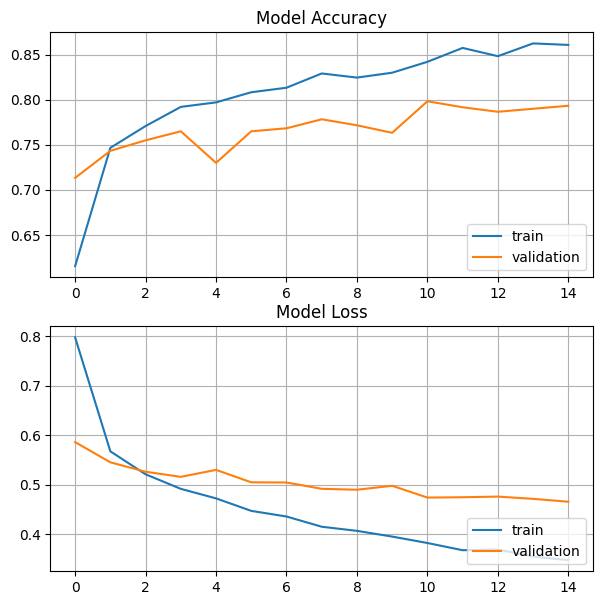

In [ ]:
fig, (modelAcc, modelLoss) = plt.subplots(2)
fig.set_figwidth(7)
fig.set_figheight(7)

modelAcc.set_title('Model Accuracy')
modelAcc.grid()
modelAcc.plot(history_1.history['accuracy'])
modelAcc.plot(history_1.history['val_accuracy'])
modelAcc.legend(['train', 'validation'], loc="lower right")

modelLoss.set_title('Model Loss')
modelLoss.grid()
modelLoss.plot(history_1.history['loss'])
modelLoss.plot(history_1.history['val_loss'])
modelLoss.legend(['train', 'validation'], loc="lower right")


plt.show()

## 2.5. Подготовьте набор проверочных данных см. Задание №1 (п. 1.2, 1.3, 1.4)

In [ ]:
from urllib.request import urlopen
import cv2
import numpy as np

correct_answers = ['Cat', 'Panda', 'Dog', 'Panda', 'Cat']
imageUrls = [
    "https://i.natgeofe.com/n/548467d8-c5f1-4551-9f58-6817a8d2c45e/NationalGeographic_2572187.jpg?w=636&h=424",
    "https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Grosser_Panda.JPG/640px-Grosser_Panda.JPG",
    "https://www.thekennelclub.org.uk/media/5092/australian-shepherd-puppy.jpg?mode=crop&width=800&height=600&rnd=132957076910000000",
    "https://cdn-st1.rtr-vesti.ru/vh/pictures/xw/250/565/5.jpg",
    "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSujkITO7lWHVPdOpYcB5_toTF_cfF74vh2kbpqNyIZBKbxi3JE33fqqnET6Iam_0XGilE&usqp=CAU"
    ]

images = []
for imageUrl in imageUrls:
    req = urlopen(imageUrl)
    image = np.asarray(bytearray(req.read()), dtype=np.uint8)
    image = cv2.imdecode(image, -1)
    images.append(image)

In [ ]:
def normalize(images, shape):
  proc_images = []
  for image in images:
    proc_image = image.copy()
    proc_image = cv2.resize(proc_image, (shape[0], shape[1]))
    proc_images.append(proc_image)
  return np.asarray(proc_images)

In [ ]:
def predict(models, images):
    normalized_images = normalize(images, (500, 500, 3))
    models_predictions = []
    for model in models: 
        prediction = model.predict(normalized_images)
        models_predictions.append(prediction)
    return models_predictions

In [ ]:
def decode_prediction(prediction, class_names):
    max_index = np.argmax(prediction)
    max_indices = np.argpartition(prediction, -3)[-3:]
    top3 = []
    for index in max_indices:
        top3.append([class_names[index], prediction[index]])
    return sorted(top3, key=lambda lst: lst[1], reverse=True)

In [ ]:
def print_predict(class_names, models_predictions, correct_answers, image, image_index):
    output = image.copy()

    height = 20
    margin = 30
    models_margin = 40
    _ = cv2.putText(output, f'{correct_answers[image_index]}', (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
    for i, model_predition in enumerate(models_predictions):
        height += models_margin
        _ = cv2.putText(output, f'{i+1}', (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
        predictions = decode_prediction(model_predition[image_index], class_names)
        for pred in predictions:
            height += margin
            text = "{}: {:.2f}%".format(pred[0], pred[1] * 100)
            _ = cv2.putText(output, text, (10, height), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                (0, 0, 255), 2)
    plt.figure()
    plt.axis('off')
    plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))

## 2.6. Организуйте вывод изображений и соответствующих им классов

1/1 [==============================] - 0s 18ms/step


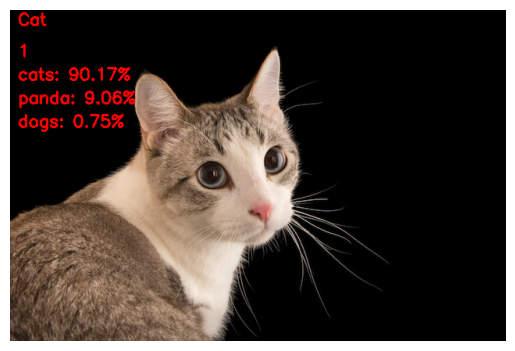

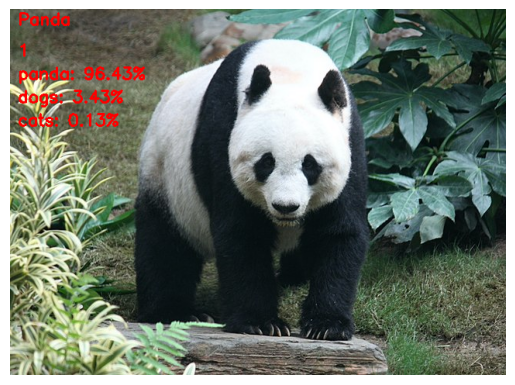

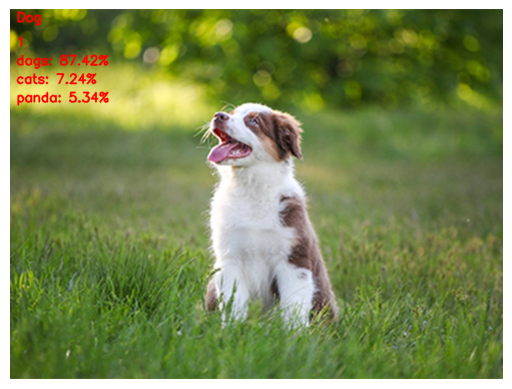

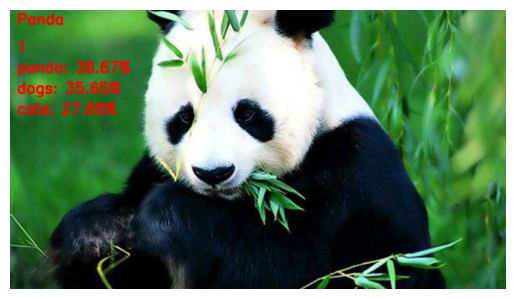

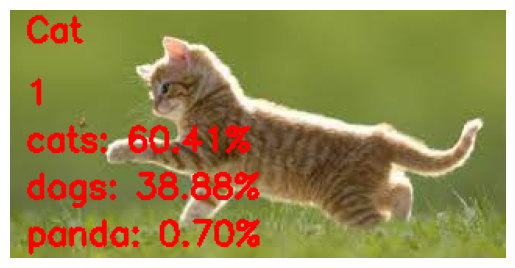

In [ ]:
predictions = predict(models=[model_1], images=images)
for i, image in enumerate(images):
    print_predict(class_names, predictions, correct_answers, image, i)